# Simple Linear Regression DeepDive

In [12]:
import torch

X = 2 * torch.rand(100,1)
y = 4 + 3 * X + torch.randn(100,1)

In [13]:
# device agnostic code
device = "cuda" if torch.cuda.is_available else "cpu"

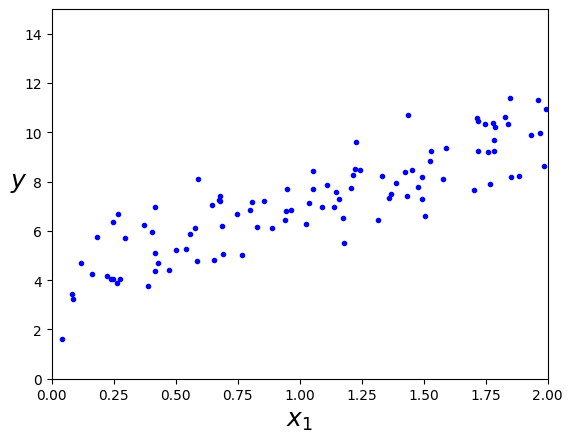

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [15]:
import numpy as np
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

C:\Users\Krrish\AppData\Local\Temp\ipykernel_10936\715367628.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [16]:
theta_best = torch.from_numpy(theta_best)

In [17]:
X_new = torch.tensor([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b = torch.from_numpy(X_new_b) # convert numpy into tensor
y_predict = X_new_b.mm(theta_best) # mm (matrix multi) === .dot() from numpy
y_predict

tensor([[ 3.9282],
        [10.1680]], dtype=torch.float64)

## Why the Fuck? Pytorch don't have default dtype of torch.float32 ? Fuck tho Tensors

(np.float64(0.0), np.float64(2.0), np.float64(0.0), np.float64(15.0))

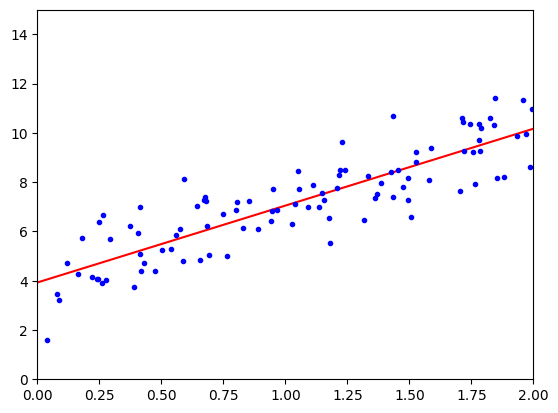

In [18]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

### we can explore how to get readymade DL ANN model but let's put that in the end

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.928159], dtype=float32), array([[3.119899]], dtype=float32))

In [20]:
lin_reg.predict(X_new)

array([[ 3.928159  ],
       [10.16795707]])

In [21]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

tensor([[3.9282],
        [3.1199]], dtype=torch.float64)

In [22]:
np.linalg.pinv(X_b).dot(y)

C:\Users\Krrish\AppData\Local\Temp\ipykernel_10936\1917854471.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.linalg.pinv(X_b).dot(y)


array([[3.92815842],
       [3.11989906]])

## Using Batch Gradient Descent

[2.41199791]
[3.02225659]
[3.34574091]
[3.51361642]
[3.59715501]
[3.63508109]
[3.64843225]
[3.64863478]
[3.64189214]
[3.63156977]
[3.61949102]
[3.60664135]
[3.5935511]
[3.58050341]
[3.56764721]
[3.55505867]
[3.54277453]
[3.53081026]
[3.51916987]
[3.50785129]
[3.49684925]
[3.48615687]
[3.47576652]
[3.46567023]
[3.45586001]
[3.44632792]
[3.43706617]
[3.42806715]
[3.41932342]
[3.41082776]
[3.40257314]
[3.39455273]
[3.38675988]
[3.37918813]
[3.37183123]
[3.36468306]
[3.35773771]
[3.35098942]
[3.34443261]
[3.33806183]
[3.33187182]
[3.32585743]
[3.3200137]
[3.31433577]
[3.30881894]
[3.30345864]
[3.29825044]
[3.29319001]
[3.28827316]
[3.28349581]
[3.27885402]
[3.27434393]
[3.26996181]
[3.26570402]
[3.26156704]
[3.25754744]
[3.25364189]
[3.24984715]
[3.24616009]
[3.24257763]
[3.23909683]
[3.23571478]
[3.2324287]
[3.22923585]
[3.2261336]
[3.22311937]
[3.22019066]
[3.21734505]
[3.21458017]
[3.21189375]
[3.20928355]
[3.20674741]
[3.20428323]
[3.20188896]
[3.19956263]
[3.19730231]
[3.19510612]
[3.

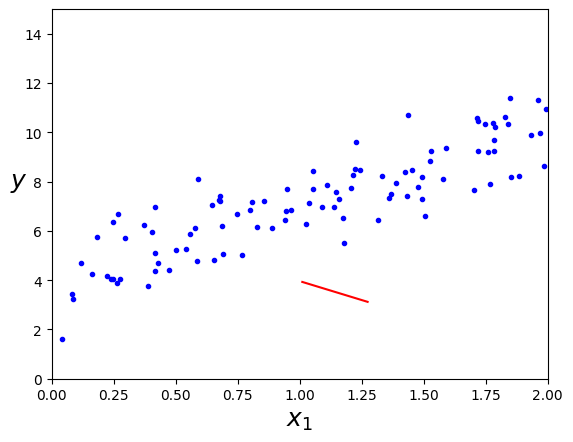

In [71]:
 eta = 0.1  # learning rate
 n_iterations = 1000
 m = 100
 theta = np.random.randn(2,1)  # random initialization
 n_theta = np.array((theta, theta))
 for iteration in range(n_iterations):
     gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y.numpy())
     theta = theta - eta * gradients
     print(theta[1])
     if iteration == 0:
         n_theta[[0]] = theta
     if  iteration == n_iterations:
         n_theta[[1]] = theta
 lr_graph(n_theta)

In [63]:
theta, n_theta[0], n_theta[1]

(array([[3.92815842],
        [3.11989906]]),
 array([[2.43470757],
        [1.73422124]]),
 array([[1.35494021],
        [0.42685995]]))

In [66]:
def lr_graph(n_theta):
    plt.plot(X, y, "b.")
    plt.plot(n_theta[1], theta , "r-")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.show()

## Stochastic Gradient Descent

In [74]:
 n_epochs = 50
 t0, t1 = 5, 50  # learning schedule hyperparameters
 
 def learning_schedule(t):
     return t0 / (t + t1)
 
 theta = np.random.randn(2,1)  # random initialization
 for epoch in range(n_epochs):
     for i in range(m):
         random_index = np.random.randint(m)
         xi = X_b[random_index:random_index+1]
         yi = y.numpy()[random_index:random_index+1]
         gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
         eta = learning_schedule(epoch * m + i)
         theta = theta - eta * gradients

In [75]:
theta

array([[3.88387995],
       [3.21924061]])

In [77]:
from sklearn.linear_model import SGDRegressor
sdg_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sdg_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [78]:
sdg_reg.intercept_, sdg_reg.coef_

(array([3.92029811]), array([3.12067929]))

## Polynomial Regression

In [80]:
 m = 100
 X = 6 * np.random.rand(m, 1) - 3
 y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

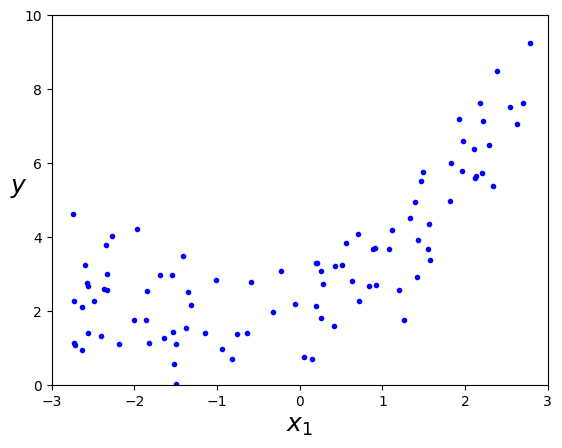

In [88]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [91]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([1.97225663]), array([1.97225663, 3.88979623]))

In [94]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.90649108]), array([[1.02473017, 0.48802993]]))

If a model performs well on the training data but generalizes poorly
 according to the cross-validation metrics, then your model is overfitting. If it per
forms poorly on both, then it is underfitting. This is one way to tell when a model is
 too simple or too complex.
 Another way is to look at the learning curves: these are plots of the model’s perfor
mance on the training set and the validation set as a function of the training set size
 (or the training iteration). To generate the plots, simply train the model several times
 on different sized subsets of the training set. 

In [97]:
 from sklearn.metrics import mean_squared_error
 from sklearn.model_selection import train_test_split
 def plot_learning_curves(model, X, y):
     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
     train_errors, val_errors = [], []
     for m in range(1, len(X_train)):
         model.fit(X_train[:m], y_train[:m])
         y_train_predict = model.predict(X_train[:m])
         y_val_predict = model.predict(X_val)
         train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
         val_errors.append(mean_squared_error(y_val, y_val_predict))
     plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
     plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

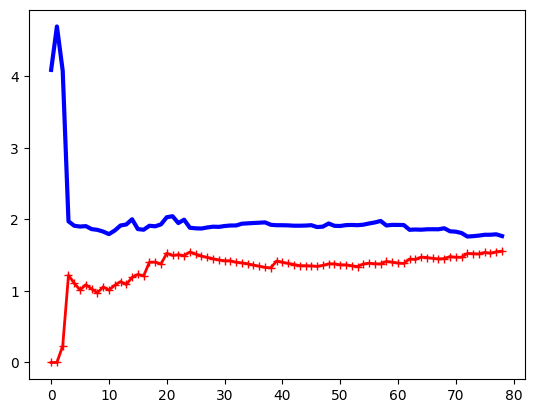

In [98]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)